# Visualize the performed benchmarks

**Note**: Error visualization for rust is not implemented yet!

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# settings
plt.rcParams['figure.figsize'] = [10, 5]

In [311]:
# Save figures as png? 
save_figs = True

#FIGNAME = "Benchmark_23_01_07"

## Define Filenames 

# with native python code
FILENAME_py = "results/py_benchmark_results.csv" 
# with numba
FILENAME_nu = "results/numba_benchmark_results.csv" 
# with transonic
FILENAME_tr = "results/transonic_benchmark_results.csv" 
# with native rust code
Filename_ru = "results/rust_benchmark_results.csv" 

In [232]:
# import python result values
df_py = pd.read_csv(FILENAME_py)

# import numba result values
df_nu = pd.read_csv(FILENAME_nu)

# import transonic result values
df_tr = pd.read_csv(FILENAME_tr)

# import rust result values
df_ru = pd.read_csv(Filename_ru)

In [341]:
df_py

,N,t_FRLT,e_FRLT_max,e_rel_FRLT_max,t_G1,e_G1_max,e_rel_G1_max,t_R1,e_R1_max,e_rel_R1_max
0,1000,0.034008,0.022443,0.008927,0.210047,30.086360,0.994553,0.595195,0.060616,0.260852
1,2500,0.082019,0.052602,0.003102,1.335306,30.221600,0.997824,3.816312,0.024246,0.268284
2,5000,0.170038,0.070476,0.002326,5.465559,30.266681,0.998912,15.428801,0.012123,0.270762
3,7500,0.247059,0.080245,0.002648,12.053759,30.281707,0.999275,34.408988,0.008082,0.271588
4,10000,0.342076,0.087141,0.002875,21.507864,30.289221,0.999456,61.809558,0.006062,0.272001
5,12500,0.422094,0.092630,0.003056,33.748377,30.293729,0.999565,95.522477,0.004849,0.272248
6,15000,0.503113,0.097284,0.003210,48.260475,30.296734,0.999638,137.541244,0.004041,0.272414
7,20000,0.665149,0.105029,0.003472,86.095787,30.300491,0.999728,247.153268,0.003031,0.272620


In [233]:
# Column entries
col_lst = ['t_FRLT','e_FRLT_max','e_rel_FRLT_max',
           't_G1','e_G1_max','e_rel_G1_max',
           't_R1','e_R1_max', 'e_rel_R1_max']
# Methods (short)
mtd_lst = ['py','nu','tr','ru']
# Methods (long)
method_lst = ['Pyhton','Numba','Transonic','Rust']

df = pd.DataFrame()
df['N'] = df_py['N']
for i in range(len(col_lst)):
    ## import from
    # python
    df = df.join(df_py[col_lst[i]])
    df = df.rename(columns={col_lst[i]:''.join([col_lst[i],'_',mtd_lst[0]])})
    # numba
    df = df.join(df_nu[col_lst[i]])
    df = df.rename(columns={col_lst[i]:''.join([col_lst[i],'_',mtd_lst[1]])})
    # transonic
    df = df.join(df_tr[col_lst[i]])
    df = df.rename(columns={col_lst[i]:''.join([col_lst[i],'_',mtd_lst[2]])})
    # rust
    df = df.join(df_ru[col_lst[i]])
    df = df.rename(columns={col_lst[i]:''.join([col_lst[i],'_',mtd_lst[3]])})
#print(df)

# Plot results 

In [322]:
# create lists for times and errors
# Times
t_lst = []        # (short)
t_method_lst = [] # (long)
for i in range(0,len(col_lst),3):
    for j in range(len(mtd_lst)):
        t_lst.append(''.join([col_lst[i],'_',mtd_lst[j]]))
        t_method_lst.append(''.join([col_lst[i],' ',method_lst[j]]))

# errors
e_lst = []        # (short)
e_method_lst = [] # (long)
for i in range(1,len(col_lst),3):
    for j in range(len(mtd_lst)):
        e_lst.append(''.join([col_lst[i],'_',mtd_lst[j]]))
        e_method_lst.append(''.join([col_lst[i],' ',method_lst[j]]))

# relative errors
e_rel_lst = []        # (short)
e_rel_method_lst = [] # (long)
for i in range(2,len(col_lst),3):
    for j in range(len(mtd_lst)):
        e_rel_lst.append(''.join([col_lst[i],'_',mtd_lst[j]]))
        e_rel_method_lst.append(''.join([col_lst[i],' ',method_lst[j]]))

In [324]:
## Define colour and symbols for plots
# colour for differen algorithms 
#   FRTLT , G1 , R1
col = ['g','b','r']
# symbol for different approachees
#       py , nu , tr , ru 
sym = ['.:','x:','+:','d:']

# create list of all variations
sym_lst = []
for i in range(len(col)):
    for j in range(len(sym)):
        sym_lst.append(''.join([col[i],sym[j]]))

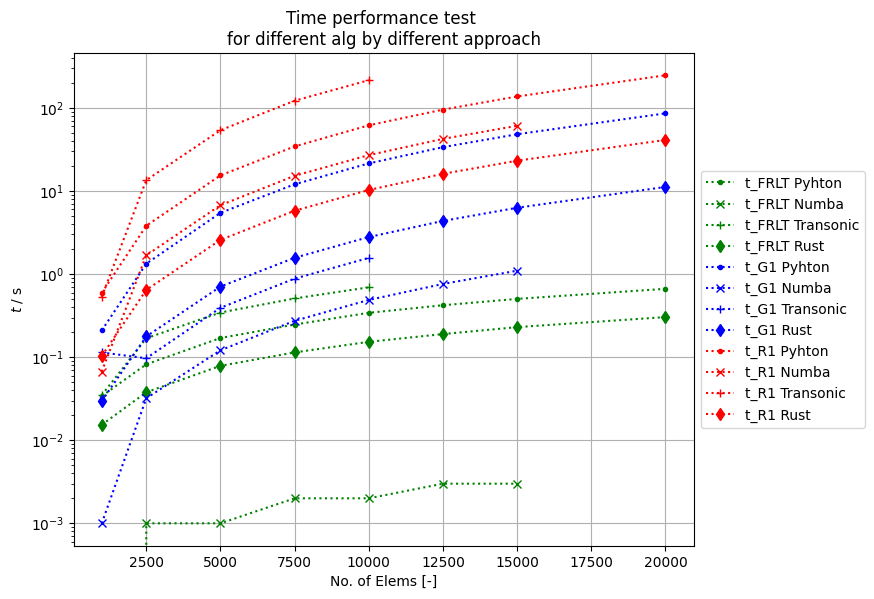

In [325]:
## Plot performance test for each alg and each approach
plt.rcParams['figure.figsize'] = [10, 8]
fig = plt.figure()
ax = plt.subplot(111)
   
for i in range(len(t_lst)):   
    ax.semilogy(df_py['N'], df[t_lst[i]],
                sym_lst[i],
                label=t_method_lst[i])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8, box.height*0.8])

plt.title('Time performance test \nfor different alg by different approach')
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.xlabel('No. of Elems [-]')
plt.ylabel('$\it{t}$ / s')
plt.grid(visible=True)

plt.show()

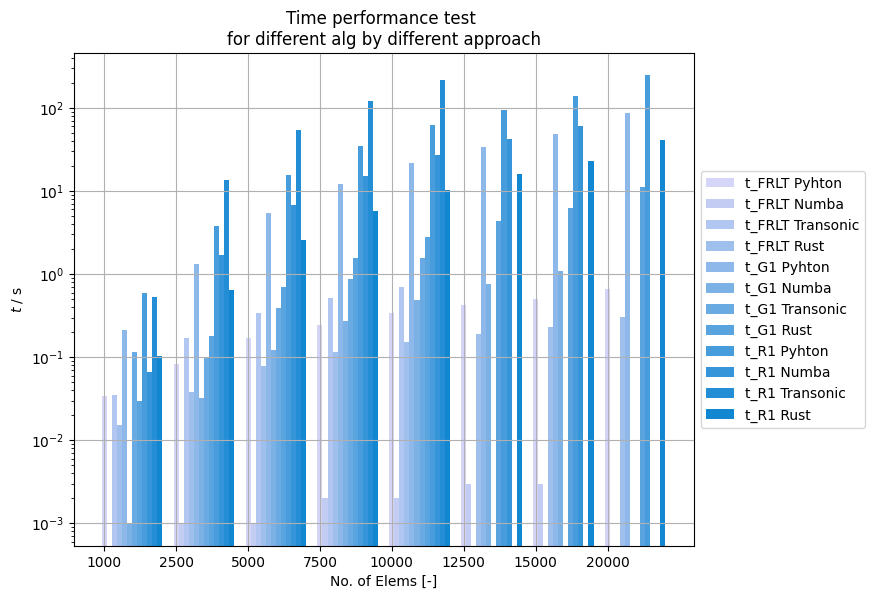

In [300]:
## Plot performance test for each alg and each approach
plt.rcParams['figure.figsize'] = [10, 8]
fig = plt.figure()
ax = plt.subplot(111)

x = np.arange(len(df['N']))
width = 0.07 # the width of the bars

for i in range(len(t_lst)):
    ax.bar(x+i*width, df[t_lst[i]], width,
        label=t_method_lst[i],
        color=tuple(c/360 for c in (300-(i)*25,300-(i)*10,350-(i)*5)))

ax.set_xticks(x, df_py['N'])
ax.set_yscale('log')
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8, box.height*0.8])

plt.title('Time performance test \nfor different alg by different approach')
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.xlabel('No. of Elems [-]')
plt.ylabel('$\it{t}$ / s')
plt.grid(visible=True)
#if save_figs:
#    plt.savefig(''.join(['images/',FIGNAME,'_time_python.png']), dpi=600)
plt.show()

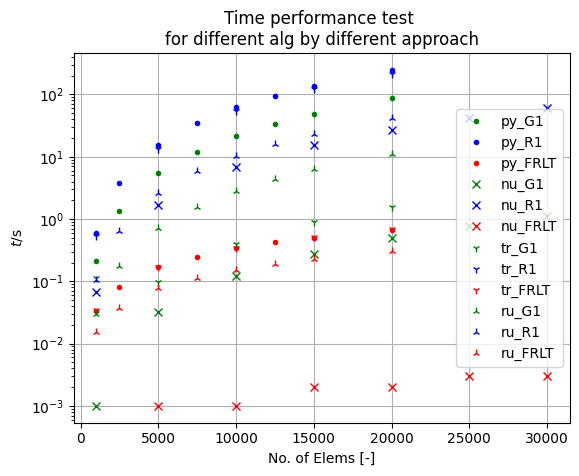

In [25]:
## Plot performance test for each alg and each approach
#fig = plt.figure()
#ax = plt.subplot(111)


plt.semilogy(df_py['N'],df_py['t_G1'],'g.',
            df_py['N'],df_py['t_R1'],'b.',
            df_py['N'],df_py['t_FRLT'],'r.',
            df_nu['N'],df_nu['t_G1'],'gx',
            df_nu['N'],df_nu['t_R1'],'bx',
            df_nu['N'],df_nu['t_FRLT'],'rx',
            df_tr['N'],df_tr['t_G1'],'g1',
            df_tr['N'],df_tr['t_R1'],'b1', 
            df_tr['N'],df_tr['t_FRLT'],'r1',
            df_ru['N'],df_ru['t_G1'],'g2',
            df_ru['N'],df_ru['t_R1'],'b2', 
            df_ru['N'],df_ru['t_FRLT'],'r2')

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.8, box.height*0.8])

plt.title('Time performance test \nfor different alg by different approach')

plt.legend(['py_G1','py_R1','py_FRLT',
            'nu_G1','nu_R1','nu_FRLT',
            'tr_G1','tr_R1','tr_FRLT',
            'ru_G1','ru_R1','ru_FRLT'])
plt.xlabel('No. of Elems [-]')
plt.ylabel('$\it{t}$/s')
plt.grid(visible=True)
if save_figs:
    plt.savefig(''.join(['images/',FIGNAME,'_time_python.png']), dpi=600)
plt.show()

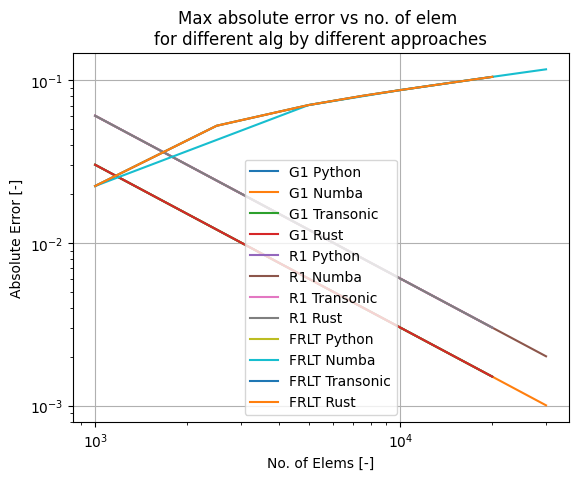

In [10]:
## Plot absolute error vs elems for each alg and each approach
plt.loglog(df_py['N'],df_py['e_G1_max'], df_nu['N'],df_nu['e_G1_max'], df_tr['N'],df_tr['e_G1_max'], df_Ru['N'],df_Ru['e_G1_max'],
         df_py['N'],df_py['e_R1_max'], df_nu['N'],df_nu['e_R1_max'], df_tr['N'],df_tr['e_R1_max'], df_Ru['N'],df_Ru['e_R1_max'],
         df_py['N'],df_py['e_FRLT_max'], df_nu['N'],df_nu['e_FRLT_max'], df_tr['N'],df_tr['e_FRLT_max'], df_Ru['N'],df_Ru['e_FRLT_max'])

plt.title('Max absolute error vs no. of elem \nfor different alg by different approaches')
plt.legend(['G1 Python', 'G1 Numba', 'G1 Transonic', 'G1 Rust',
            'R1 Python', 'R1 Numba', 'R1 Transonic','R1 Rust',
            'FRLT Python', 'FRLT Numba', 'FRLT Transonic', 'FRLT Rust'])
plt.xlabel('No. of Elems [-]')
plt.ylabel('Absolute Error [-]')
plt.grid(visible=True)
if save_figs:
    plt.savefig(''.join(['images/',FIGNAME,'_abs_err.png']), dpi=600)
plt.show()

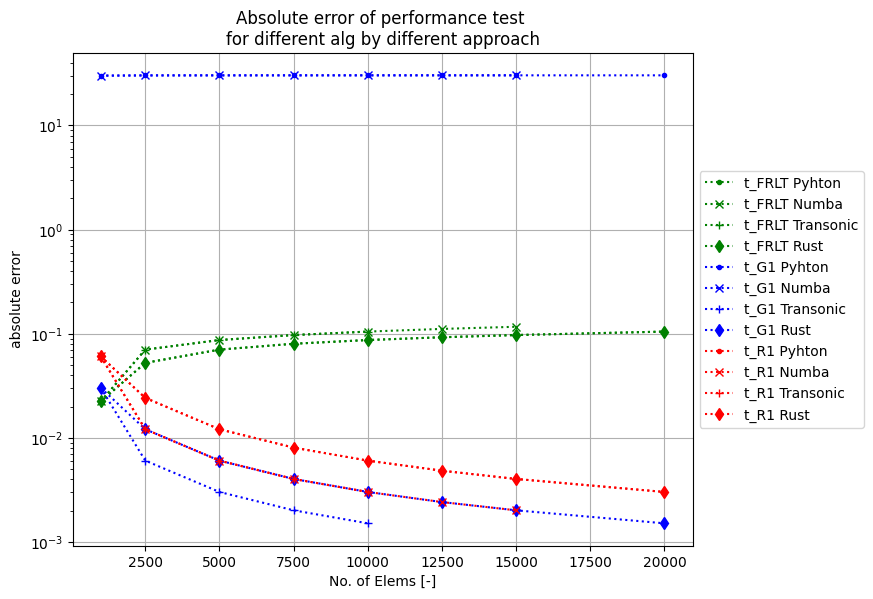

In [335]:
## Plot performance test for each alg and each approach
plt.rcParams['figure.figsize'] = [10, 8]
fig = plt.figure()
ax = plt.subplot(111)
   
for i in range(len(t_lst)):   
    ax.semilogy(df_py['N'], df[e_lst[i]],
                sym_lst[i],
                label=e_method_lst[i])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8, box.height*0.8])

plt.title('Absolute error of performance test \nfor different alg by different approach')
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.xlabel('No. of Elems [-]')
plt.ylabel('absolute error')
plt.grid(visible=True)

plt.show()

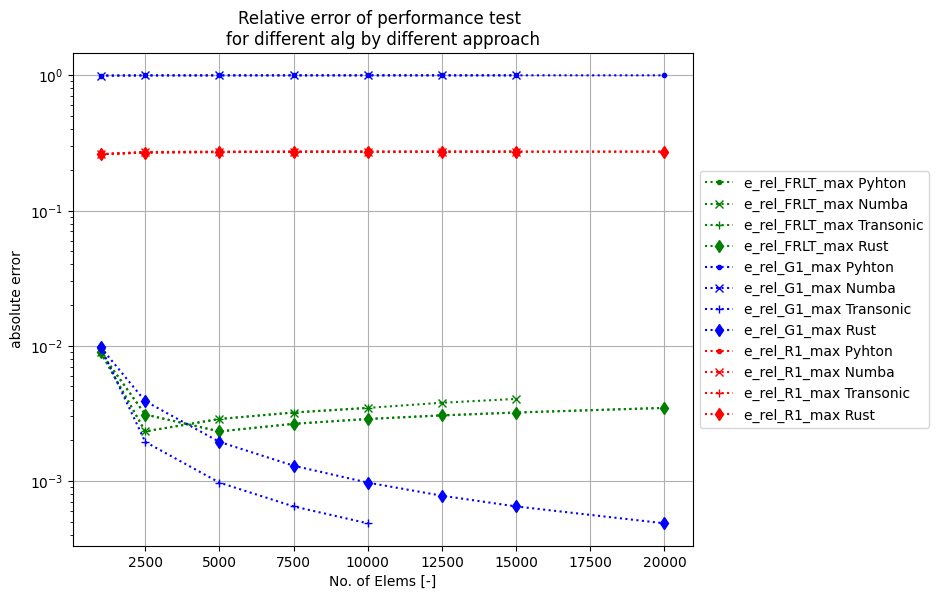

In [336]:
## Plot performance test for each alg and each approach
plt.rcParams['figure.figsize'] = [10, 8]
fig = plt.figure()
ax = plt.subplot(111)
   
for i in range(len(t_lst)):   
    ax.semilogy(df_py['N'], df[e_rel_lst[i]],
                sym_lst[i],
                label=e_rel_method_lst[i])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8, box.height*0.8])

plt.title('Relative error of performance test \nfor different alg by different approach')
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.xlabel('No. of Elems [-]')
plt.ylabel('absolute error')
plt.grid(visible=True)

plt.show()

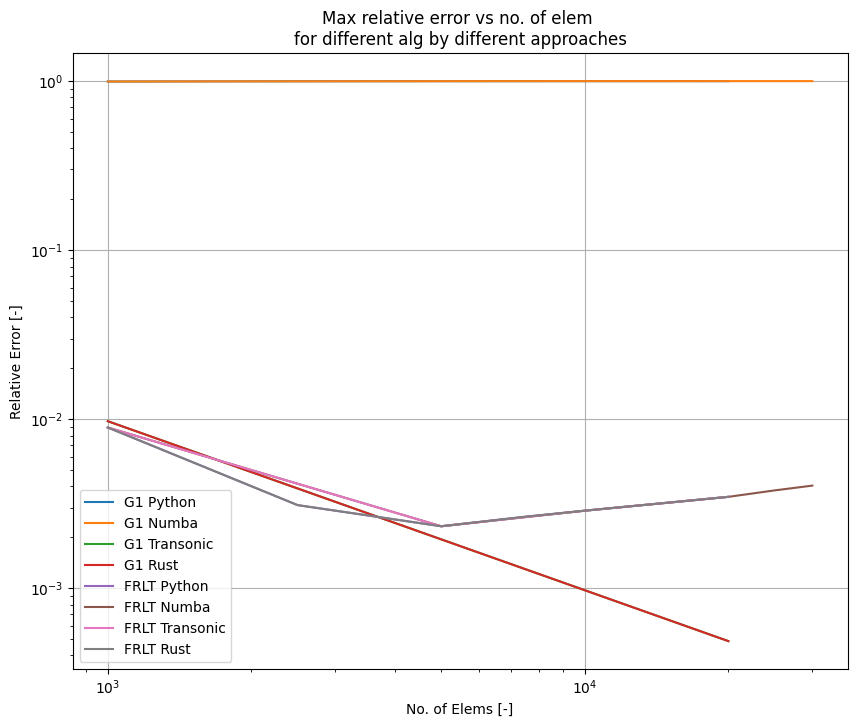

In [330]:
## Plot absolute error vs elems for each alg and each approach
plt.loglog(df_py['N'],df_py['e_rel_G1_max'], df_nu['N'],df_nu['e_rel_G1_max'], df_tr['N'],df_tr['e_rel_G1_max'],df_ru['N'],df_ru['e_rel_G1_max'],
           df_py['N'],df_py['e_rel_FRLT_max'], df_nu['N'],df_nu['e_rel_FRLT_max'], df_tr['N'],df_tr['e_rel_FRLT_max'], df_ru['N'],df_ru['e_rel_FRLT_max'])

plt.title('Max relative error vs no. of elem \nfor different alg by different approaches')
plt.legend(['G1 Python', 'G1 Numba', 'G1 Transonic','G1 Rust',
            'FRLT Python', 'FRLT Numba', 'FRLT Transonic','FRLT Rust'])
plt.xlabel('No. of Elems [-]')
plt.ylabel('Relative Error [-]')
plt.grid(visible=True)

plt.show()

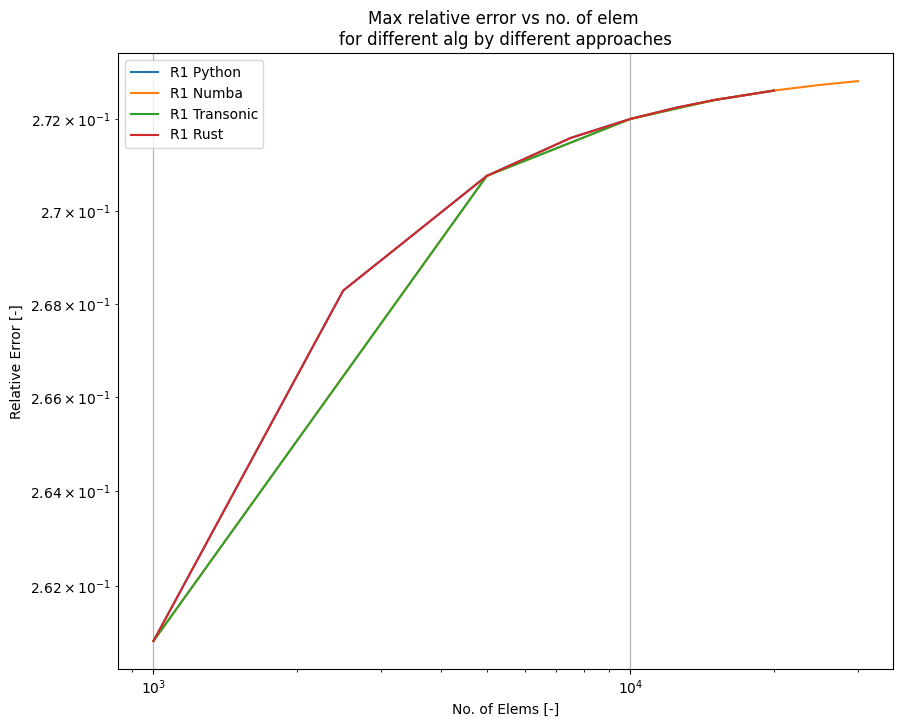

In [333]:
## Plot absolute error vs elems for each alg and each approach
plt.loglog(df_py['N'],df_py['e_rel_R1_max'], df_nu['N'],df_nu['e_rel_R1_max'], df_tr['N'],df_tr['e_rel_R1_max'], df_ru['N'],df_ru['e_rel_R1_max'])

plt.title('Max relative error vs no. of elem \nfor different alg by different approaches')
plt.legend(['R1 Python', 'R1 Numba', 'R1 Transonic', 'R1 Rust'])
plt.xlabel('No. of Elems [-]')
plt.ylabel('Relative Error [-]')
plt.grid(visible=True)
#if save_figs:
#    plt.savefig(''.join(['images/',FIGNAME,'_rel_err_2.png']), dpi=600)
plt.show()